In [ ]:
## Exponential Smoothing

In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [49]:
train_data = pd.read_csv("Dataset/train_data.csv")
valid_data = pd.read_csv("Dataset/valid_data.csv")

In [50]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [51]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


# Preprocesamiento requerido 

In [52]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [53]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

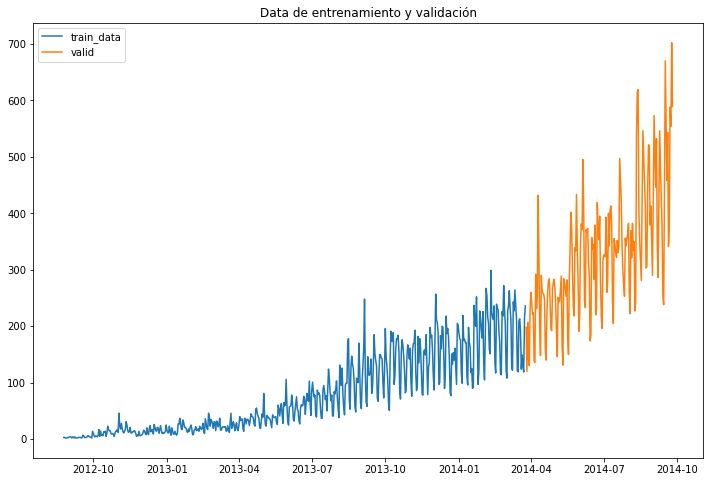

In [54]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Data de entrenamiento y validación")
plt.show()

# Exponential Smoothing

In [55]:
from statsmodels.tsa.api import SimpleExpSmoothing

<img src = "alpha values.png">

In [59]:
model = SimpleExpSmoothing(np.asarray(train_data['count']))
model = model.fit(smoothing_level=0.7,initial_level=3,optimized=False) 

valid_data['SES'] = model.forecast(len(valid_data)) 

In [60]:
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

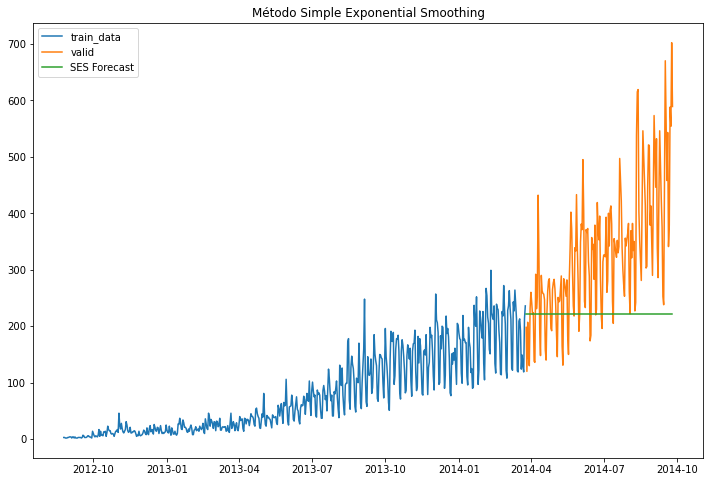

In [61]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['SES'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Método Simple Exponential Smoothing")
plt.show()

In [62]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['SES']))
print('El valor del RMSE para el método Simple Exponential Smoothing es ', rmse)

El valor del RMSE para el método Simple Exponential Smoothing es  156.57206825628182


# Double Exponential Smoothing

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [64]:
model = ExponentialSmoothing(np.asarray(train_data['count']), trend='add')
model = model.fit(smoothing_level=0.7, smoothing_slope=0.0001, initial_slope = 1.2) #  

valid_data['Holt_linear'] = model.forecast(len(valid_data))

In [66]:
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1.281103043390324,
 'initial_trend': 1.2,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

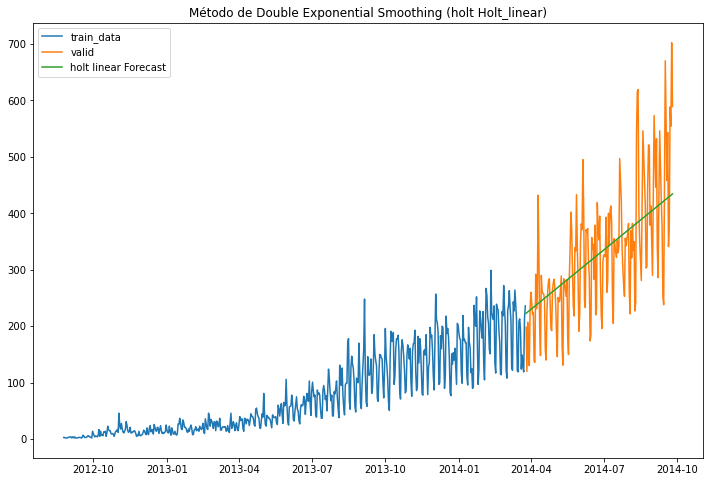

In [67]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_linear'], label='holt linear Forecast')
plt.legend(loc='best')
plt.title("Método de Double Exponential Smoothing (holt Holt_linear)")
plt.show()

In [68]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Holt_linear']))
print('El valor del RMSE para el método Holt Linear es', rmse)

El valor del RMSE para el método Holt Linear es 85.9670964033565


# Holt's Winters (triple exponential smoothing)

In [43]:
from statsmodels.tsa.api import ExponentialSmoothing

In [69]:
model = ExponentialSmoothing(np.asarray(train_data['count']) ,seasonal_periods=7 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.4, smoothing_slope=0.1, smoothing_seasonal=0.8) #

valid_data['Holt_Winter'] = fit1.forecast(len(valid_data)) 

In [72]:
model.params

{'smoothing_level': 0.4,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.8,
 'damping_trend': nan,
 'initial_level': 5.109030732040526,
 'initial_trend': -2.985857299847193,
 'initial_seasons': array([0.25582177, 0.2987063 , 0.32805616, 0.32184247, 0.40120023,
        0.14485219, 0.51668245]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

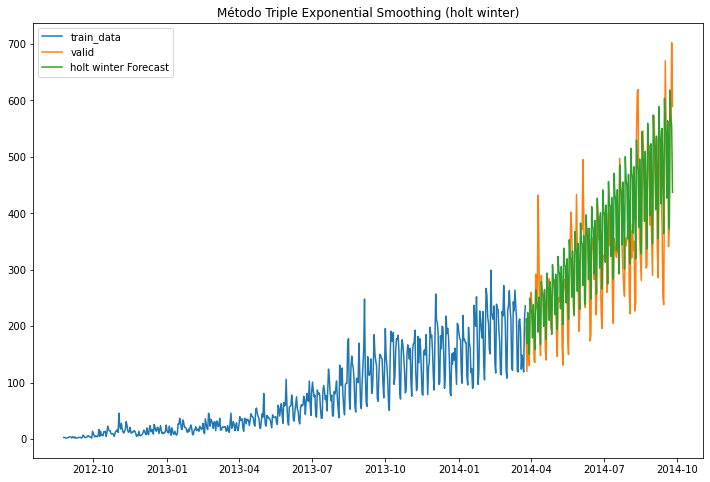

In [73]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Método Triple Exponential Smoothing (holt winter)")
plt.show()

In [74]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Holt_Winter']))
print('El valor del RMSE para el método Holt Winter es', rmse)

El valor del RMSE para el método Holt Winter es 78.59684424893265
